---
title: Dask 101
subtitle: D.03.10 HANDS-ON TRAINING - EarthCODE 101 Hands-On Workshop - Example showing how to access data on the EarthCODE Open Science Catalog and working with the Pangeo ecosystem on EDC
authors:
  - name: Deyan Samardzhiev
    github: sunnydean
    orcid: 0009-0003-3803-8522
    affiliations:
      - id: Lampata UK
        institution: Lampata UK
reviewers:
  - name: Anne Fouilloux
    orcid: 0000-0002-1784-2920
    github: annefou
    affiliations:
      - id: Simula Research Laboratory
        institution: Simula Research Laboratory
        ror: 00vn06n10
date: 2025-06-01
thumbnail: https://raw.githubusercontent.com/ESA-EarthCODE/documentation/refs/heads/main/pages/public/img/EarthCODE_kv_transparent.png
keywords: ["earthcode", "pangeo", "stac", "xarray", "earth observation", "remote sensing"]
tags: ["pangeo"]
releaseDate: 2025-06-01
datePublished: 2025-06-01
dateModified: 2025-06-01
banner: ../static/PANGEO.png
github: https://github.com/sunnydean/LPS25_Pangeo_x_EarthCODE_Workshop
license: MIT
---

# Context
We will be using Dask with Xarray to parallelize our data analysis. The analysis is very similar to what we have done in previous examples but this time we will use data on a global coverage that we read from the SeasFire Cube.

### Data

In this workshop, we will be using the [SeasFire Data Cube](https://opensciencedata.esa.int/products/seasfire-cube/collection) published to the EarthCODE Open Science Catalog

#### Related publications
* *Alonso, Lazaro, Gans, Fabian, Karasante, Ilektra, Ahuja, Akanksha, Prapas, Ioannis, Kondylatos, Spyros, Papoutsis, Ioannis, Panagiotou, Eleannna, Michail, Dimitrios, Cremer, Felix, Weber, Ulrich, & Carvalhais, Nuno. (2022). SeasFire Cube: A Global Dataset for Seasonal Fire Modeling in the Earth System (0.4) [Data set]. Zenodo. @alonso-2024. The same dataset can also be downloaded from Zenodo: https://zenodo.org/records/13834057*


In [1]:
import dask.distributed
import xarray

## Scale with Dask


#### How does Dask scale and accelerate your data analysis?

[Dask proposes different abstractions to distribute your computation](https://docs.dask.org/en/stable/10-minutes-to-dask.html). In this _Dask Introduction_ section, we will focus on [Dask Array](https://docs.dask.org/en/stable/array.html) which is widely used in pangeo ecosystem as a back end of Xarray.

As shown in the [previous section](./chunking_introduction.ipynb) Dask Array is based on chunks.
Chunks of a Dask Array are well-known Numpy arrays. By transforming our big datasets to Dask Array, making use of chunk, a large array is handled as many smaller Numpy ones and we can compute each of these chunks independently.

![Dask and Numpy](https://examples.dask.org/_images/dask-array-black-text.svg)



#### How does Xarray with Dask distribute data analysis?

When we use chunks with `Xarray`, the real computation is only done when needed or asked for, usually when invoking `compute()` or `load()` functions. Dask generates a **task graph** describing the computations to be done. When using [Dask Distributed](https://distributed.dask.org/en/stable/) a **Scheduler** distributes these tasks across several **Workers**.

![Xarray with da sk](../static/dask-xarray-explained.png)

### What is a Dask Distributed cluster ?

A Dask Distributed cluster is made of two main components:

- a Scheduler, responsible for handling computations graph and distributing tasks to Workers.
- One or several (up to 1000s) Workers, computing individual tasks and storing results and data into distributed memory (RAM and/or worker's local disk).

A user usually needs __Client__ and __Cluster__ objects as shown below to use Dask Distributed.    

![Dask Distributed Cluster](https://user-images.githubusercontent.com/306380/66413985-27111600-e9be-11e9-9995-8f418ff48f8a.png)

#### Where can we deploy a Dask distributed cluster?


[Dask distributed clusters can be deployed on your laptop or on distributed infrastructures (Cloud, HPC centers, Hadoop, etc.)](https://docs.dask.org/en/stable/deploying.html)  Dask distributed `Cluster` object is responsible of deploying and scaling a Dask Cluster on the underlying resources.

EDC has one such deployment


![Dask Cluster deployment](https://docs.dask.org/en/stable/_images/dask-cluster-manager.svg)

:::{tip}
A Dask `Cluster` can be created on a single machine (for instance your laptop) e.g. there is no need to have dedicated computational resources. However, speedup will only be limited to your single machine resources if you do not have dedicated computational resources!
:::

## Scaling your Computation using Dask Gateway.

For this workshop, you will learn how to use Dask Gateway to manage Dask clusters over Kubernetes, allowing to run our data analysis in parallel e.g. distribute tasks across several workers.

Dask Gateway is a component that helps you manage and create Dask Clusters across your environment.
As Dask Gateway is configured by default on this infrastructure, you just need to execute the following cells.

Note that, if you're executing this locally, without prior setup for dask gateway, the following code will crash. If you would like to run this locally, skip these lines and continue with the local dask client above

In [ ]:
from dask_gateway import Gateway
gateway = Gateway()

## EDC Dask Gateway Options

EDC Pangeo's Dask Gateway provides several cluster configurations for your workloads. You can choose the appropriate size based on your computational needs:

- **`small`**  
  - **Worker cores:** 0.5  
  - **Worker memory:** 1 GB  

- **`medium`**  
  - **Worker cores:** 2  
  - **Worker memory:** 2 GB  

- **`larger`**  
  - **Worker cores:** 4  
  - **Worker memory:** 4 GB  

You can set these options when spawning your Dask clusters to ensure optimal resource allocation.


In [ ]:
cluster_options = gateway.cluster_options()
cluster_options

In [ ]:
cluster = gateway.new_cluster(cluster_options=cluster_options)
cluster.scale(2)
cluster

### Get a client from the Dask Gateway Cluster

As stated above, creating a Dask `Client` is mandatory in order to perform following Daks computations on your Dask Cluster.

In [ ]:
client = cluster.get_client()
client

### Dask Dashboard

Dask comes with a really handy interface: the Dask Dashboard. It is a web interface that you can open in a separated tab of your browser.

We will learn here how to use it through [dask jupyterlab extension](https://github.com/dask/dask-labextension).  

To use Dask Dashboard through jupyterlab extension on Pangeo EDC infrastructure,
you will just need too look at the html link you have for your jupyterlab, and Dask dashboard port number, as highlighted in the figure below.

![Dash Board link](../static/dashboardlink.png)
![Dash lab](../static/dasklab.png)

Then click the orange icon indicated in the above figure, and type 'your' dashboard link.


You can click several buttons indicated with blue arrows in above figures, then drag and drop to place them as your convenience.  

![Example dask lab](../static/exampledasklab.png)


It's really helpfull to understand your computation and how it is distributed.

In [4]:
http_url = "https://s3.waw4-1.cloudferro.com/EarthCODE/OSCAssets/seasfire/seasfire_v0.4.zarr/"

ds = xarray.open_dataset(
	http_url,
	engine='zarr',
    chunks={},
	consolidated=True
)
ds

<xarray.Dataset> Size: 164GB
Dimensions:                         (latitude: 720, longitude: 1440, time: 966)
Coordinates:
  * latitude                        (latitude) float64 6kB 89.88 ... -89.88
  * longitude                       (longitude) float64 12kB -179.9 ... 179.9
  * time                            (time) datetime64[ns] 8kB 2001-01-01 ... ...
Data variables: (12/59)
    area                            (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    biomes                          (latitude, longitude) float32 4MB dask.array<chunksize=(180, 360), meta=np.ndarray>
    cams_co2fire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    cams_frpfire                    (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_max                (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    drought_code_mean               (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ...                              ...
    t2m_max                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_mean                        (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    t2m_min                         (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    tp                              (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    vpd                             (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
    ws10                            (time, latitude, longitude) float32 4GB dask.array<chunksize=(966, 180, 360), meta=np.ndarray>
Attributes:
    crs:          EPSG:4326
    description:  The SeasFire Cube is a scientific datacube for seasonal fir...
    title:        SeasFire Cube: A Global Dataset for Seasonal Fire Modeling ...

In [5]:
mask= ds['lsm'][:,:]
gwis_all= ds.gwis_ba.resample(time="1YE").sum()
gwis_all= gwis_all.where(mask>0.5)

gwis_2020= gwis_all.sel(time='2020-08-01', method='nearest')
gwis_2020.data

dask.array<getitem, shape=(720, 1440), dtype=float32, chunksize=(180, 360), chunktype=numpy.ndarray>

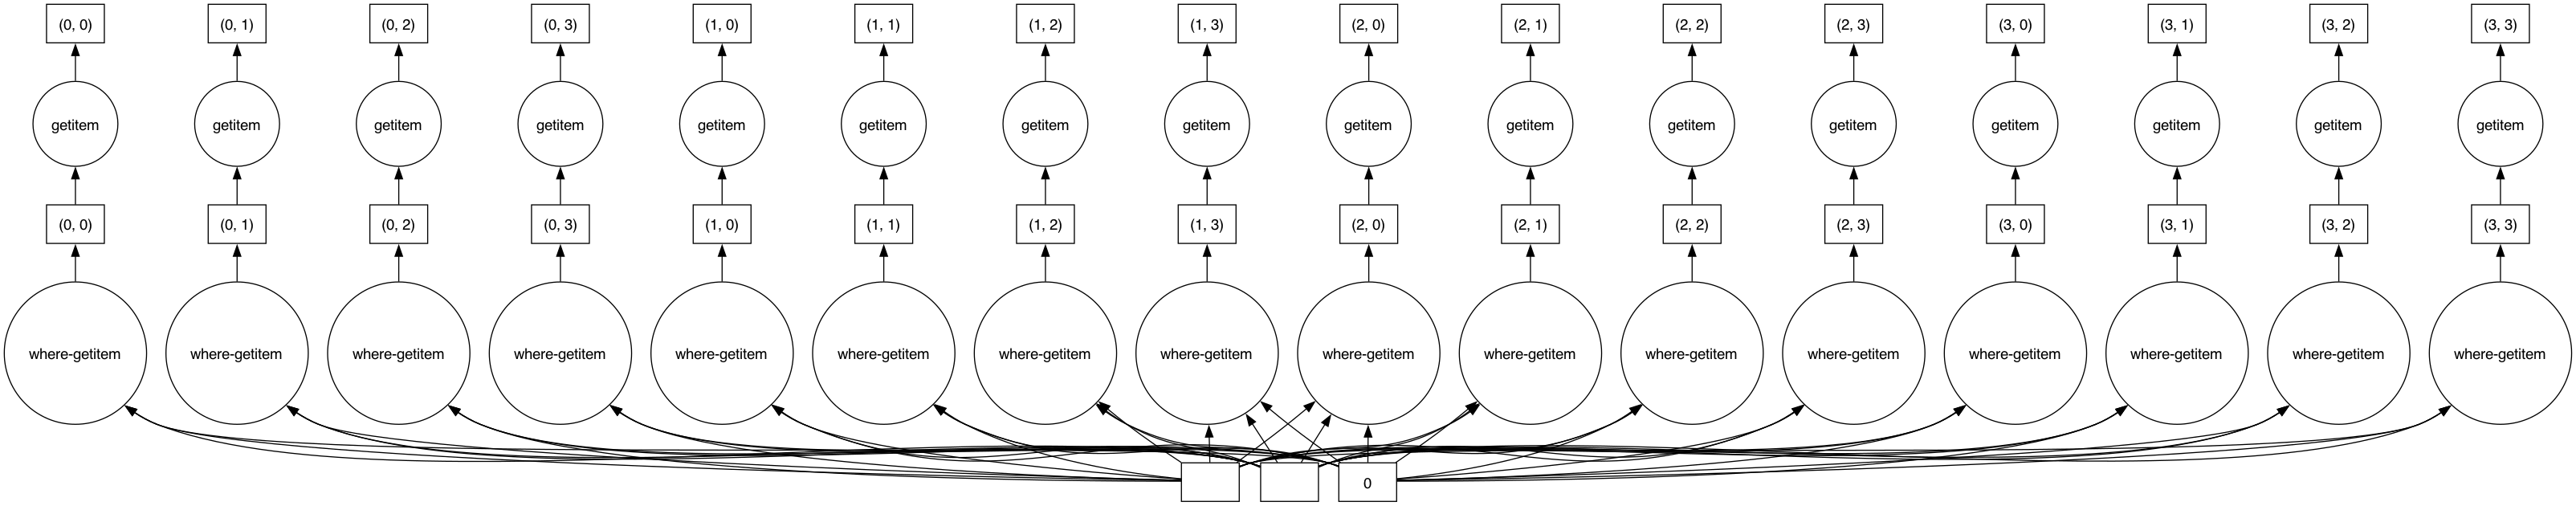

In [6]:
gwis_2020.data.visualize(optimize_graph=True)

Did you notice something on the Dask Dashboard when running the two previous cells?

We didn't 'compute' anything. We just built a Dask task graph with it's size indicated as count above, but did not ask Dask to return a result.

Note that underneath, dask optimizes the execution graph (opaquely), so as to minimize overheads and overall execution resources (hence why we're passing optimize_graph=True)

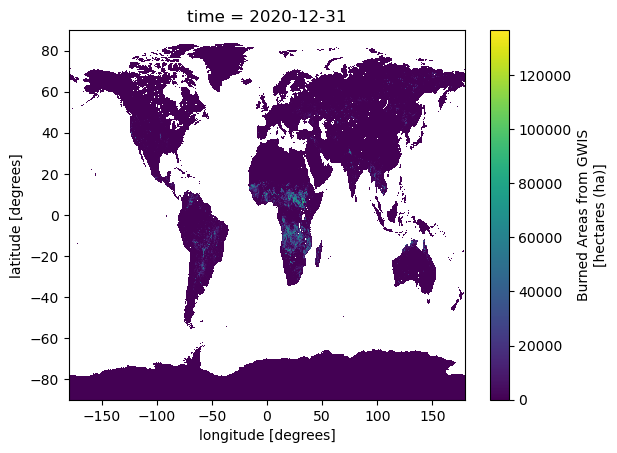

In [7]:
gwis_2020.plot()

# Closing Clusters
Close Clusters to Clean Resources for the next exercise (generally a good practice!)

In [ ]:
# close client to clean resources
client.close()